In [113]:
import numpy as np
import os
import glob
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_est/connectivity_matrices/',p[i]+'/tracto_op_2_est/connectivity_matrices/']
    d[i] = a

all_mod = {}
all_gb = {}
all_cpl = {}
data1mod = []
data2mod = []
data1ge = []
data2ge = []
data1cpl = []
data2cpl = []
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__sc.npy'):#('__tot_commit2_weights.npy'):
            tot = d[i][0] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                gb = eng.compute_gb(tot)
        if f.endswith('__len.npy'):
            clen = d[i][0] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)
    
    for l in os.listdir(d[i][1]):
        if l.endswith('__sc.npy'):#('__tot_commit2_weights.npy'):
            tot1 = d[i][1]  + l
            if os.path.exists(tot1):
                mod1 = eng.compute_mod(tot1)
                gb1 = eng.compute_gb(tot1)
        if l.endswith('__len.npy'):
            clen1 = d[i][1] + l
            if os.path.exists(clen1):
                cpl1 = eng.compute_cpl(clen1)
                
    data1mod.append(mod)
    data2mod.append(mod1)
    data1ge.append(gb)
    data2ge.append(gb1)
    data1cpl.append(cpl)
    data2cpl.append(cpl1)
    all_mod[i] = [mod, mod1]
    all_gb[i] = [gb, gb1]
    all_cpl[i] = [cpl, cpl1]
    mod = np.nan
    mod1 = np.nan
    gb = np.nan
    gb1 = np.nan
    cpl = np.nan
    cpl1 = np.nan
eng.quit()

In [ ]:
Ldata2mod

In [61]:
def cov_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.nanmean([data1, data2], axis=0)
    std       = np.nanstd([data1, data2], axis=0)                  # Difference between data1 and data2
    cov        = (std / mean)                  # Mean of the difference
    return cov

In [114]:
cov_mod = cov_cal(data1mod,data2mod)
cov_ge = cov_cal(data1ge,data2ge)
cov_cpl = cov_cal(data1cpl,data2cpl)

In [43]:
def diff_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    diff      = np.abs(data1 - data2)
    return diff

In [46]:
diff_mod = diff_cal(data1mod,data2mod)
diff_ge = diff_cal(data1ge,data2ge)
diff_cpl = diff_cal(data1cpl,data2cpl)

In [ ]:
Ldiff_mod

In [ ]:
pe1_mod = []
for i in all_mod:
    pe1_mod.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )
    
pe1_ge = []
for i in all_gb:
    pe1_ge.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    
pe1_cpl = []
for i in all_cpl:
    pe1_cpl.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )
pe2_mod = []
for i in all_mod:
    pe2_mod.append( abs( ( (all_mod[i][0] - all_mod[i][1]) / all_mod[i][1] ) * 100 ) )
    
pe2_ge = []
for i in all_gb:
    pe1_ge.append( abs ( ( (all_gb[i][0] - all_gb[i][1]) / all_gb[i][1] ) * 100 ) ) 
    
pe2_cpl = []
for i in all_cpl:
    pe1_cpl.append( abs( ( (all_cpl[i][0] - all_cpl[i][1]) / all_cpl[i][1] ) * 100) )    

In [49]:
import pandas as pd
df1 = pd.DataFrame(diff_mod).assign(x='Without L(r)')
df2 = pd.DataFrame(Ldiff_mod).assign(x='With L(r)')

df3 = pd.DataFrame(diff_ge).assign(x='Without L(r)')
df4 = pd.DataFrame(Ldiff_ge).assign(x='With L(r)')

df5 = pd.DataFrame(diff_cpl).assign(x='Without L(r)')
df6 = pd.DataFrame(Ldiff_cpl).assign(x='With L(r)')

dfmod = pd.concat([df1,df2])
dfge = pd.concat([df3,df4])
dfcpl = pd.concat([df5,df6])

In [115]:
import pandas as pd
df1 = pd.DataFrame(cov_mod).assign(x='Without L(r)').dropna()
df2 = pd.DataFrame(Lcov_mod).assign(x='With L(r)').dropna()

df3 = pd.DataFrame(cov_ge).assign(x='Without L(r)').dropna()
df4 = pd.DataFrame(Lcov_ge).assign(x='With L(r)').dropna()

df5 = pd.DataFrame(cov_cpl).assign(x='Without L(r)').dropna()
df6 = pd.DataFrame(Lcov_cpl).assign(x='With L(r)').dropna()

dfmod = pd.concat([df1,df2])
dfge = pd.concat([df3,df4])
dfcpl = pd.concat([df5,df6])

In [35]:
df2[0]

0      0.020686
1      0.210019
2      0.198472
3      0.002775
4      0.001291
         ...   
111    0.279634
112    0.003535
113    0.000510
114    0.016564
117    0.001991
Name: 0, Length: 115, dtype: float64

In [37]:
data1mod = []
data2mod = []
for i in all_mod:
    if ~np.isnan(all_mod[i][0]) and ~np.isnan(all_mod[i][1]):
        data1mod.append(all_mod[i][0])
        data2mod.append(all_mod[i][1])

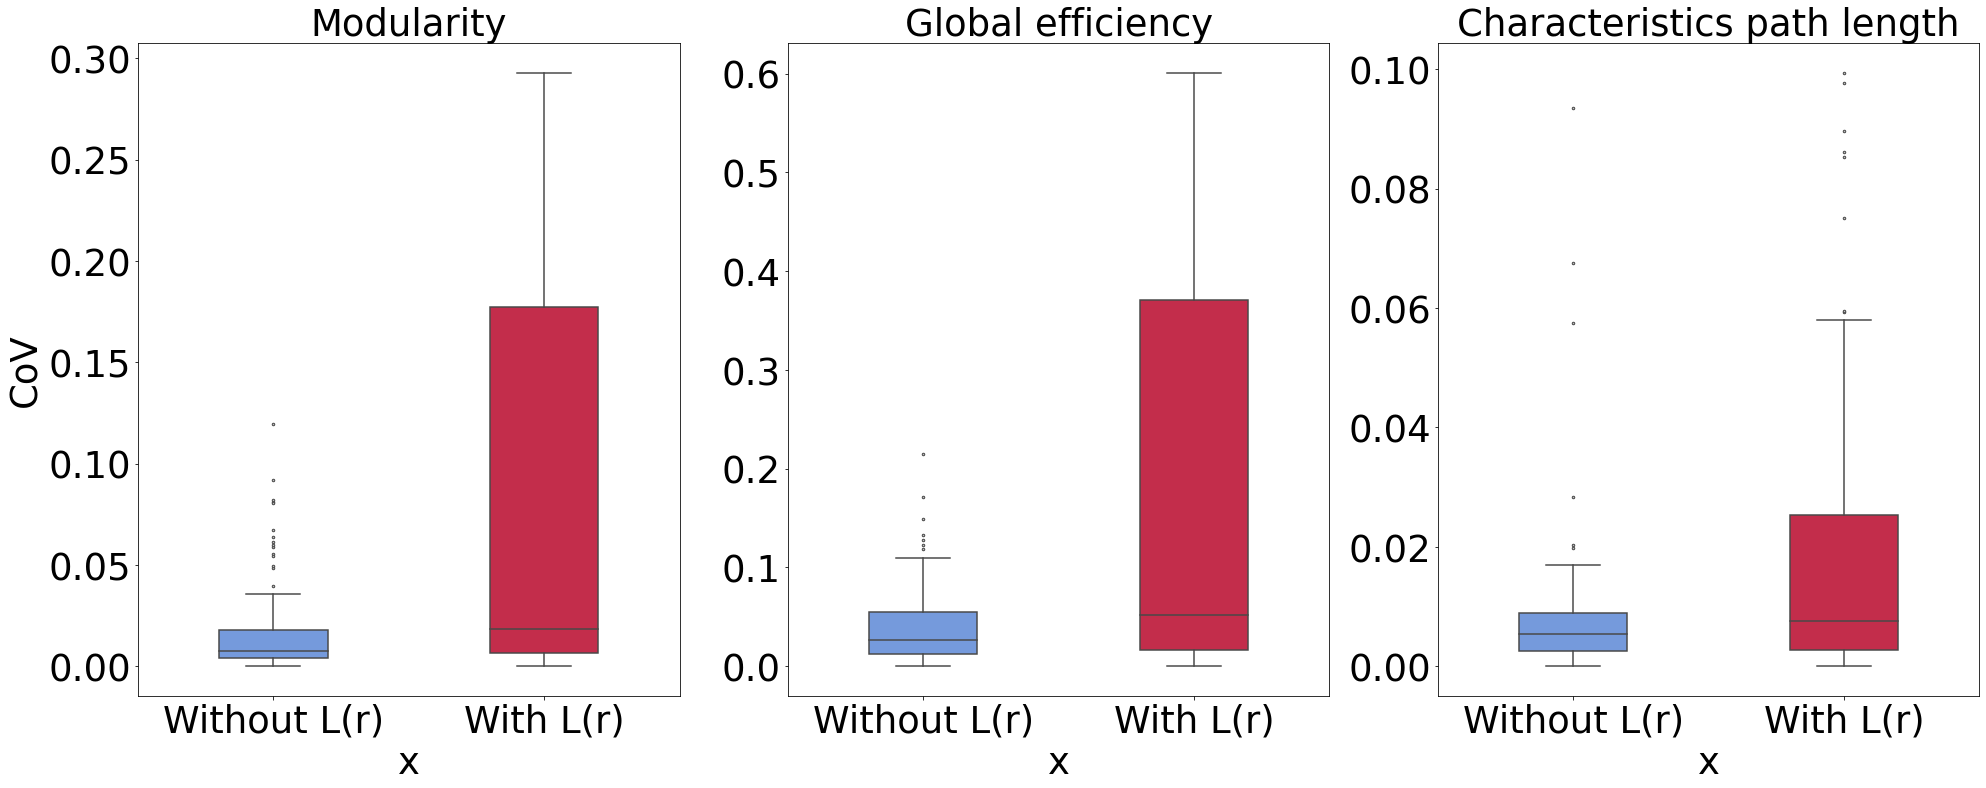

In [145]:
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize=(33,12)) # gridspec_kw = {'width_ratios': [1,0.5,0.5]})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
palette= {'Without L(r)': 'cornflowerblue','With L(r)': 'crimson'}
sns.boxplot(ax = axes[0], x="x",y=0,data=dfmod,flierprops=flierprops, width=0.4 , palette=palette)
axes[0].set_title('Modularity', fontsize=37)
axes[0].set_ylabel('CoV',fontsize = 37)


sns.boxplot(ax = axes[1],x="x",y=0,data=dfge,flierprops=flierprops, width=0.4 ,palette=palette)
axes[1].set_title('Global efficiency', fontsize=37)
axes[1].set_ylabel(' ',fontsize = 37)

sns.boxplot(ax = axes[2],x="x",y=0,data=dfcpl,flierprops=flierprops, width=0.4 ,palette=palette)
axes[2].set_title('Characteristics path length', fontsize=37)
axes[2].set_ylabel(' ',fontsize = 37)
plt.rcParams.update({'font.size':37})
plt.savefig('fig1.png')

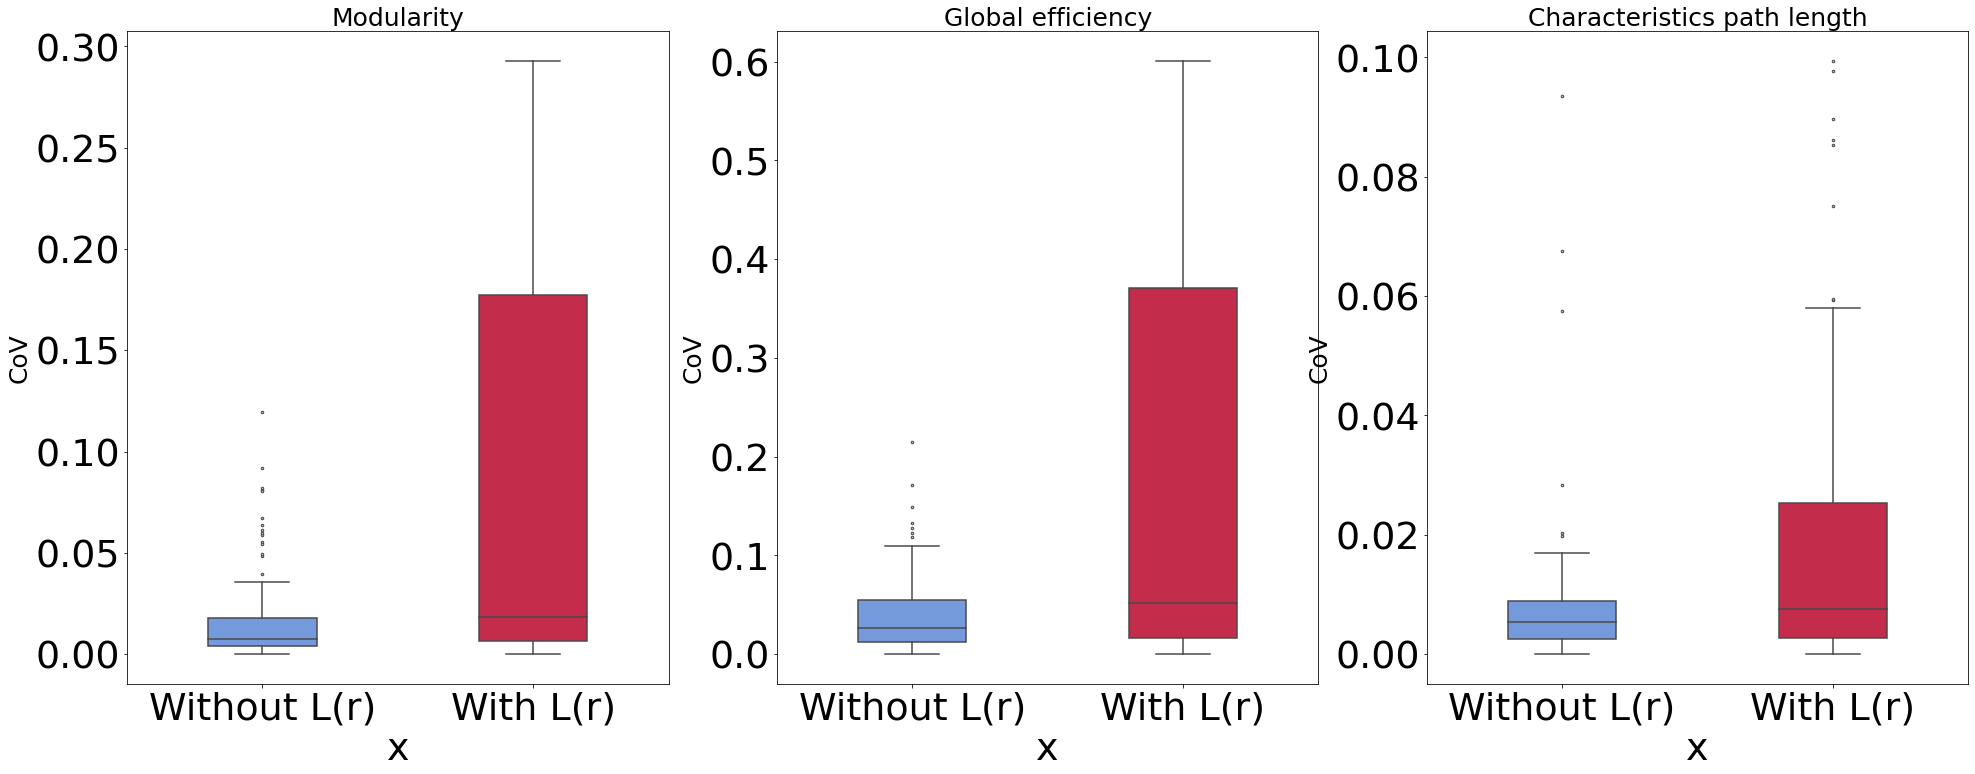

In [138]:
fig, axes = plt.subplots(1,3, figsize=(33,12))

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
palette= {'Without L(r)': 'cornflowerblue','With L(r)': 'crimson'}
sns.boxplot(ax = axes[0], x="x",y=0,data=dfmod,flierprops=flierprops, width=0.4 , palette=palette)
axes[0].set_title('Modularity', fontsize=25)
axes[0].set_ylabel('CoV',fontsize = 25)


sns.boxplot(ax = axes[1],x="x",y=0,data=dfge,flierprops=flierprops, width=0.4 ,palette=palette)
axes[1].set_title('Global efficiency', fontsize=25)
axes[1].set_ylabel('CoV',fontsize = 25)

sns.boxplot(ax = axes[2],x="x",y=0,data=dfcpl,flierprops=flierprops, width=0.4 ,palette=palette)
axes[2].set_title('Characteristics path length', fontsize=25)
axes[2].set_ylabel('CoV',fontsize = 25)
plt.rcParams.update({'font.size':25})
plt.savefig('fig1fa.png')

In [19]:
from scipy import stats
sdf1 = pd.DataFrame(diff_mod).assign(x='Without L(r)')
sdf2 = pd.DataFrame(Ldiff_mod).assign(x='With L(r)')

sdf3 = pd.DataFrame(diff_ge).assign(x='Without L(r)')
sdf4 = pd.DataFrame(Ldiff_ge).assign(x='With L(r)')

sdf5 = pd.DataFrame(diff_cpl).assign(x='Without L(r)')
sdf6 = pd.DataFrame(Ldiff_cpl).assign(x='With L(r)')

pmod = stats.wilcoxon(sdf1[0], sdf2[0])
pge = stats.wilcoxon(sdf3[0], sdf4[0])
pcpl = stats.wilcoxon(sdf5[0], sdf6[0])

In [116]:
pmod = stats.wilcoxon(df1[0], df2[0])
pge = stats.wilcoxon(df3[0], df4[0])
pcpl = stats.wilcoxon(df5[0], df6[0])

In [117]:
print(pmod,pge,pcpl)
praw = [pmod.pvalue,pge.pvalue,pcpl.pvalue]

WilcoxonResult(statistic=1595.0, pvalue=2.689807534674952e-07) WilcoxonResult(statistic=1693.0, pvalue=1.0565411802862243e-06) WilcoxonResult(statistic=1962.0, pvalue=3.204588081971656e-05)


In [118]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(praw, alpha=0.005,method='bonferroni')
p_adjusted

(array([ True,  True,  True]),
 array([8.06942260e-07, 3.16962354e-06, 9.61376425e-05]),
 0.0016694521863086509,
 0.0016666666666666668)

In [119]:
def cohend(c0,c1):
    cohens_d = (np.nanmean(c0) - np.nanmean(c1)) / (np.sqrt((np.nanstd(c0) ** 2 + np.nanstd(c1) ** 2) / 2))
    return cohens_d

In [120]:
dmod = cohend(df1[0], df2[0])
dge = cohend(df3[0], df4[0])
dcpl = cohend(df5[0], df6[0])
print(dmod,dge,dcpl)

-0.9245473884631775 -0.9221041956985943 -0.5560587442331419
